<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Data Analysis with Python</h1>
<h2>Description</h2>


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


<h3>Import Libraries</h3>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

**Load the Data**

In [64]:
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h3 id="Section_2">Question 1 : Display the data types of each column using the attribute dtypes, then take a screenshot and submit it, include your code in the image.</h3>


In [65]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<h3 id="Section_2"> Question 2 : Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True.</h3>


In [66]:
df.drop('id', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [67]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col+" has ",df[col].isnull().sum(),"null values")

print("Replace null values with Mean values of the column")

mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

bedrooms has  13 null values
bathrooms has  10 null values
Replace null values with Mean valus of the column


<h3 id= "Section-2">Question 3 : use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe. Your output should look like this :</h3>


In [68]:
unique_floors = df["floors"].value_counts()
unique_floors.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<h3 id="Section_2"> Question 4 : Use the function boxplot in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers .</h3>


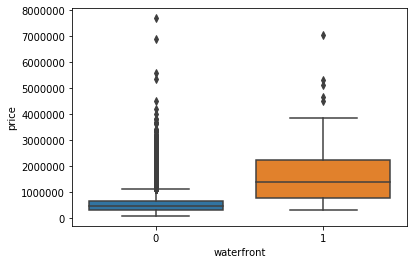

In [69]:
sns.boxplot(x= "waterfront", y= "price", data = df)

<h3 id = "Section-2">Question 5 : Use the function  regplot  in the seaborn library  to  determine if the feature sqft_above is negatively or positively correlated with price.</h3>

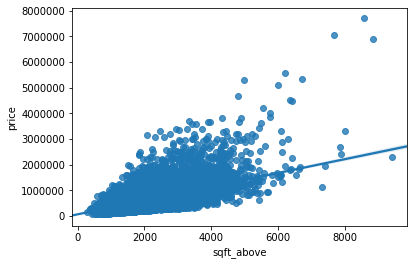

In [70]:
sns.regplot(x= "sqft_above", y= "price", data = df)

In [71]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<h3 id="Section_3">Question 6 : Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. </h3>


In [78]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X = np.array(df['sqft_living']).reshape((-1, 1))
y = np.array(df.price)

lm.fit(X,y)
r_sq = lm.score(X, y)

print('coefficient of determination:', r_sq)

coefficient of determination: 0.49285321790379316


In [79]:
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)
new_model = LinearRegression().fit(X, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)
y_pred = new_model.predict(X)
print('predicted response:', y_pred, sep='\n')

intercept: -43580.74309447361
slope: [280.6235679]
intercept: [-43580.74309447]
slope: [[280.6235679]]
predicted response:
[[287555.06702452]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]


<h3 id="Section_4">Question 7) Fit a linear regression model to predict the 'price' using the list of features:
<br>
"floors"<br>
"waterfront"<br>
"lat"<br>
"bedrooms"<br>
"sqft_basement"<br>
"view"<br>
"bathrooms"<br>
"sqft_living15"<br>
"sqft_above"<br>
"grade"<br>
"sqft_living"<br>
The calculate the R^2. Take a screenshot of your code and the value of the R^2. </h3>


In [83]:
X = np.array(df[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(df.price)

model = LinearRegression().fit(X, y)

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.65769516660375


In [84]:
print()
print('intercept:', model.intercept_)
print()
print('slope:', model.coef_)
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')


intercept: -32390308.39863208

slope: [ 1.29355789e+02 -2.92790793e+04 -2.59674430e+04  6.44145024e+01
  6.70824472e+04 -3.22416757e+03  4.44293114e+00  6.49412868e+01
  8.20072277e+04  6.02002523e+05  6.72993098e+05]
predicted response:
[283270.39007445 662572.30128728 306267.58455123 ... 304248.55129902
 428758.80343222 304046.65336952]


<h3 id="Section-2">Question 8 : Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2.</h3>


In [89]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array(df[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(df.price)
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
model = LinearRegression().fit(X_, y)
r_sq = model.score(X_, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7513408363805434


In [90]:
intercept, coefficients = model.intercept_, model.coef_
y_pred = model.predict(X_)
print()
print('intercept:', intercept)
print()
print('coefficients:', coefficients, sep='\n')
print()
print('predicted response:', y_pred, sep='\n')


intercept: -4513470246.014483

coefficients:
[-3.73745784e+10 -1.67157469e+06 -1.10860717e+06  3.73745631e+10
 -2.35669079e+06  1.60101840e+06 -1.19440085e+03  3.73745750e+10
 -6.70145758e+06 -2.93415701e+07  1.90675586e+08 -1.87075615e+00
  1.67853032e+01 -5.70798564e+00  5.44977760e+00 -1.98871157e+01
  6.14012188e+00  1.38972473e+01  4.05047078e+01  3.27028942e+01
  1.73330232e+02  1.24709833e+02  1.32402739e+04  3.28312410e+04
  4.93340916e+01  7.44422948e+03 -6.52687402e+04 -4.71792826e+01
 -3.22057580e+01  7.61214436e+03 -1.73571084e+05  3.57077039e+04
  7.11561754e+02 -5.03316998e+00  2.55615427e+03 -1.29887439e+04
  8.15513778e+00 -5.42279959e-01  1.06734603e+03 -5.68554935e+04
  2.25776370e+04 -3.64115906e+00 -1.32370489e+01 -1.87889318e+01
 -1.38814201e+01 -4.21991491e+01  1.80488836e+01 -3.81970918e-01
  1.91149090e+02  1.40143098e+03  9.75738963e+03  2.17102354e+01
 -6.39904195e+00  1.22276413e+04 -5.62642507e+04  4.78925829e+04
  1.58740755e+04 -2.28297271e+01  2.61034175

<h3 id = "Section-2">Question 9: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data.</h3>

0.9977857946524787

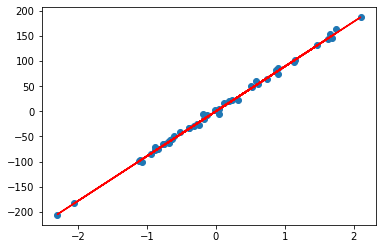

In [92]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

X = np.array(df[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(df.price)

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1)

rr = Ridge(alpha=0.1)
rr.fit(X, y)
w = rr.coef_

w

coefficients

plt.scatter(X, y)
plt.plot(X, w*X, c='red');

rr.score(X,y)

<h3 id = "Section-2">Question 10 : Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1.  Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.</h3>

In [93]:
X = np.array(df[['sqft_living','floors','bedrooms','sqft_basement','view','bathrooms','sqft_living15',
                    'sqft_above','grade','waterfront','lat']])
y = np.array(df.price).reshape(-1, 1)
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
y_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(y)

X_, y_, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1)

rr_poly = Ridge(alpha=0.1)
rr_poly.fit(X_, y_)
w = rr_poly.coef_
w

rr.score(X_,y_)

0.9977857946524787